# Proposed modification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tk
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF


from scipy.stats import ks_2samp
from scipy.special import kl_div
import scipy.stats as sc

import warnings
warnings.filterwarnings("ignore")


---
### 1. Parameters

In [2]:
Niter = int(1e6)
a0 = 2
var = .8
z0 = 1

eps = 1e-1
eta = 0.05

----
### 2. Simulation 

In [3]:
def controller(t,c,z,eps,eta):
    if np.abs(z[t+1]/z[t])<eps:
        return c[t]+z[t+1]/z[t]
    if np.abs(z[t+1]/z[t])>=eps:
        return c[t] + eta*np.sign(z[t+1]/z[t])

In [4]:
beta = np.random.randn(Niter)
beta = np.sqrt(var)*beta

zt = np.zeros(Niter)
zt[0] = z0
zt[1] = a0*zt[0] + beta[0]

ct = np.zeros(Niter)
ct[0] = 0
ct[1] = 0 + zt[1]/zt[0] 
zt[2] = (a0-ct[1])*zt[1]+beta[1]
ct[2] = controller(1,ct,zt,eps,eta)

for t in range(2,Niter-1): 
    zt[t+1] = (a0-ct[t])*zt[t] + beta[t]
    ct[t+1] = controller(t,ct,zt,eps,eta) 
    
np.savetxt("Data/nc.csv",zt, delimiter=" ")

In [5]:
print(np.mean(zt),np.var(zt))

0.001195583939945955 0.8336656094951852


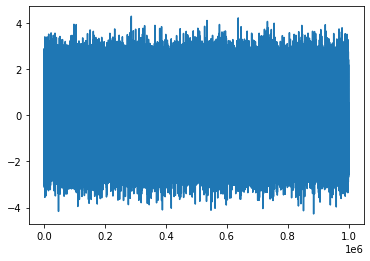

In [6]:
plt.plot(zt)